# Artificial Neural Network Heuristic: performance analysis against PDB 7-8

In this notebook, we analyze the performance of the first ANN heuristic that we trained. The ANN is a feed-forward fully-connected neural network composed of an input layer with 256 neurons, five hidden layers with 1024, 1024, 512, 128 and 64 neurons, and an output layer composed of a single neuron. An input is a board state (16 indexes of pebbles, with each index one-hot encoded, resulting in a 256-dimensional input vector). The target value for each input is the length of its optimal solution.

The neural network was trained on a dataset of roughly 6 million optimal solutions, with distribution similar to a distribution created by randomly permutating the board pebbles (and discarding unsolvable results).

The tests were run on boards created by random permutations. **The same dataset (with roughly 1600 boards) was used for testing two different heuristics**, which are described in their corresponding sections. The algorithm used for searching is A*.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Data preprocessing

In [2]:
results = pd.read_csv("/home/batman/code/fifteen-puzzle/data/experiments/ann-heuristic-benchmark-pdb8-run2.csv")
results.shape

(3192, 9)

In [3]:
results.head(10)

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION
0,2019-04-04 01:09:08.493058 PID1970,1,A*,PDB[Import;Pat:8],RND,2.527681,52,26402,42.000000
1,2019-04-04 01:09:08.511974 PID1969,1,A*,PDB[Import;Pat:8],RND,2.942530,52,30444,44.000000
2,2019-04-04 01:09:08.511974 PID1969,1,A*,ANN[Const:0;Label:small],RND,23.969739,52,7800,51.718002
3,2019-04-04 01:09:08.493058 PID1970,1,A*,ANN[Const:0;Label:small],RND,33.015175,52,11202,50.169281
4,2019-04-04 01:09:08.493058 PID1970,2,A*,PDB[Import;Pat:8],RND,2.062534,57,20553,47.000000
5,2019-04-04 01:09:08.511974 PID1969,2,A*,PDB[Import;Pat:8],RND,68.727607,64,701717,54.000000
6,2019-04-04 01:09:08.493058 PID1970,2,A*,ANN[Const:0;Label:small],RND,84.364019,59,24870,56.777000
7,2019-04-04 01:09:08.493058 PID1970,3,A*,PDB[Import;Pat:8],RND,1.788944,51,17588,43.000000
8,2019-04-04 01:09:08.511974 PID1969,2,A*,ANN[Const:0;Label:small],RND,57.748735,64,17368,63.165558
9,2019-04-04 01:09:08.511974 PID1969,3,A*,PDB[Import;Pat:8],RND,8.200512,59,84853,49.000000


In [4]:
results["HEURISTIC_NAME"].unique()

array(['PDB[Import;Pat:8]', 'ANN[Const:0;Label:small]'], dtype=object)

In [5]:
pdb_results = results[results["HEURISTIC_NAME"] == "PDB[Import;Pat:8]"]
ann_results = results[results["HEURISTIC_NAME"] == "ANN[Const:0;Label:small]"]

In [6]:
def optimal_cost(row):
    process_id = row["PROCESS_ID"]
    board_id = row["BOARD_ID"]
    
    pdb_row_df = pdb_results[(pdb_results.PROCESS_ID == process_id) & (pdb_results.BOARD_ID == board_id)]
    return pdb_row_df.iloc[0]["SOLUTION_COST"]

In [7]:
results_complete = results.copy()

results_complete["OPTIMAL_SOLUTION_COST"] = results_complete.apply(lambda row: optimal_cost(row), axis=1)
results_complete["SOLUTION_COST_ERROR"] = results_complete["SOLUTION_COST"] - results_complete["OPTIMAL_SOLUTION_COST"]
results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"] = results_complete["INITIAL_HEURISTIC_PREDICTION"] - results_complete["OPTIMAL_SOLUTION_COST"]

In [8]:
results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
0,2019-04-04 01:09:08.493058 PID1970,1,A*,PDB[Import;Pat:8],RND,2.527681,52,26402,42.000000,52,0,-10.000000
1,2019-04-04 01:09:08.511974 PID1969,1,A*,PDB[Import;Pat:8],RND,2.942530,52,30444,44.000000,52,0,-8.000000
2,2019-04-04 01:09:08.511974 PID1969,1,A*,ANN[Const:0;Label:small],RND,23.969739,52,7800,51.718002,52,0,-0.281998
3,2019-04-04 01:09:08.493058 PID1970,1,A*,ANN[Const:0;Label:small],RND,33.015175,52,11202,50.169281,52,0,-1.830719
4,2019-04-04 01:09:08.493058 PID1970,2,A*,PDB[Import;Pat:8],RND,2.062534,57,20553,47.000000,57,0,-10.000000


In [9]:
pdb_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "PDB[Import;Pat:8]"]
ann_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Const:0;Label:small]"]

## Analysis of results

Text(0.5, 0, 'optimal solution length')

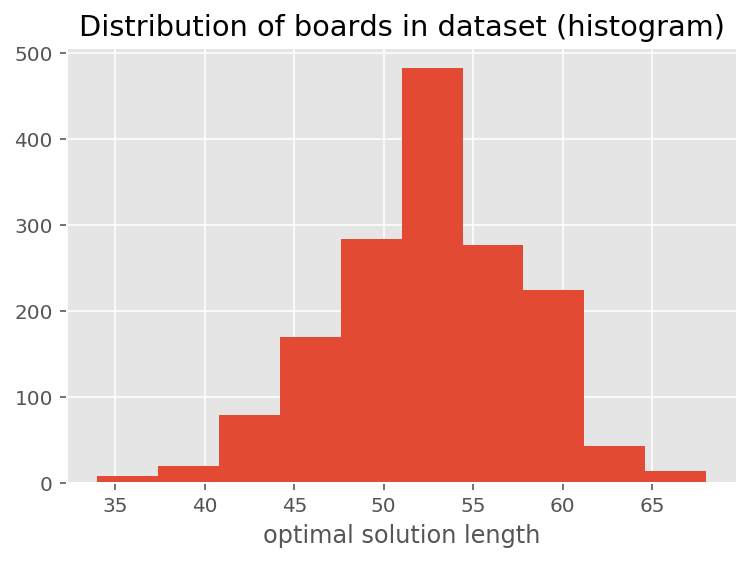

In [18]:
plt.hist(pdb_results["SOLUTION_COST"], bins=10);
plt.title("Distribution of boards in dataset (histogram)")
plt.xlabel("optimal solution length")

### Pattern Database Heuristic (8, 7) - optimal solutions

A pattern database heuristic with 2 patterns: one for pebbles 1-8, other for pebbles 9-15. Usage with A* guarantees optimal results.

In [19]:
pdb_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,1597.000000,1597.000000,1597.000000,1.597000e+03,1597.000000,1597.000000,1597.0,1597.000000
mean,400.630557,4.784677,52.437696,4.888362e+04,45.415780,52.437696,0.0,-7.021916
std,232.098080,12.106681,5.289433,1.244520e+05,4.724882,5.289433,0.0,2.257296
min,1.000000,0.016125,34.000000,6.800000e+01,28.000000,34.000000,0.0,-14.000000
25%,200.000000,0.472147,49.000000,4.791000e+03,42.000000,49.000000,0.0,-8.000000
50%,400.000000,1.522343,53.000000,1.564500e+04,45.000000,53.000000,0.0,-8.000000
75%,599.000000,4.289535,56.000000,4.513500e+04,48.000000,56.000000,0.0,-6.000000
max,836.000000,324.318261,68.000000,3.367519e+06,59.000000,68.000000,0.0,0.000000


### Artificial Neural Network Heuristic

In [20]:
ann_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,400.131661,45.942512,52.927900,13728.821317,52.331438,52.432602,0.495298,-0.101163
std,231.811293,78.350605,5.409731,23373.325750,5.287861,5.289339,0.894958,1.511632
min,1.000000,0.388659,34.000000,128.000000,34.735497,34.000000,0.000000,-5.107529
25%,200.000000,8.493392,49.000000,2517.500000,48.882464,49.000000,0.000000,-1.131310
50%,399.000000,21.161403,53.000000,6392.000000,52.408562,53.000000,0.000000,-0.186005
75%,598.500000,52.475563,57.000000,15756.500000,55.915684,56.000000,0.000000,0.869946
max,835.000000,1326.490857,69.000000,384139.000000,67.725716,68.000000,4.000000,5.972630


Improvements over the PDB heuristic:
- Average expanded nodes count: 14K (vs 48K)

Limitations:
- Average runtime: 45.9 s (vs 4.8 s)
- Small solution cost error (mean: 0.50)

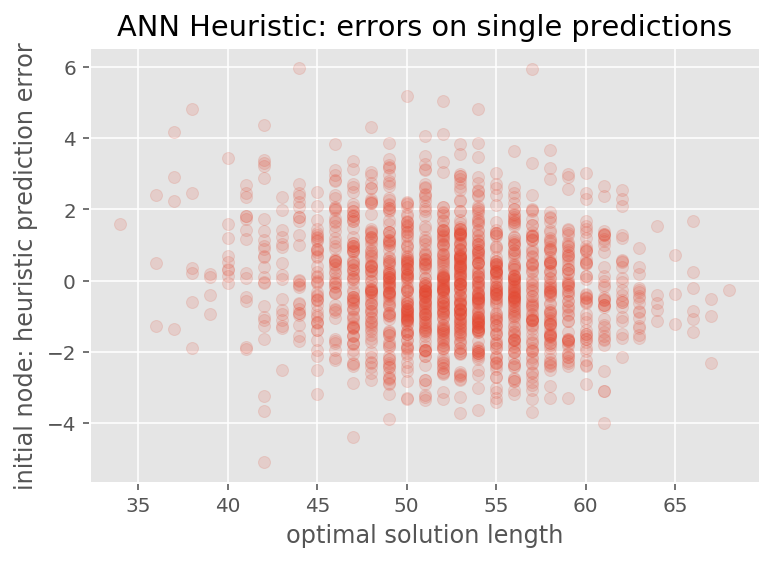

In [31]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"], alpha=0.15)
plt.title("ANN Heuristic: errors on single predictions")
plt.xlabel("optimal solution length")
plt.ylabel("initial node: heuristic prediction error");

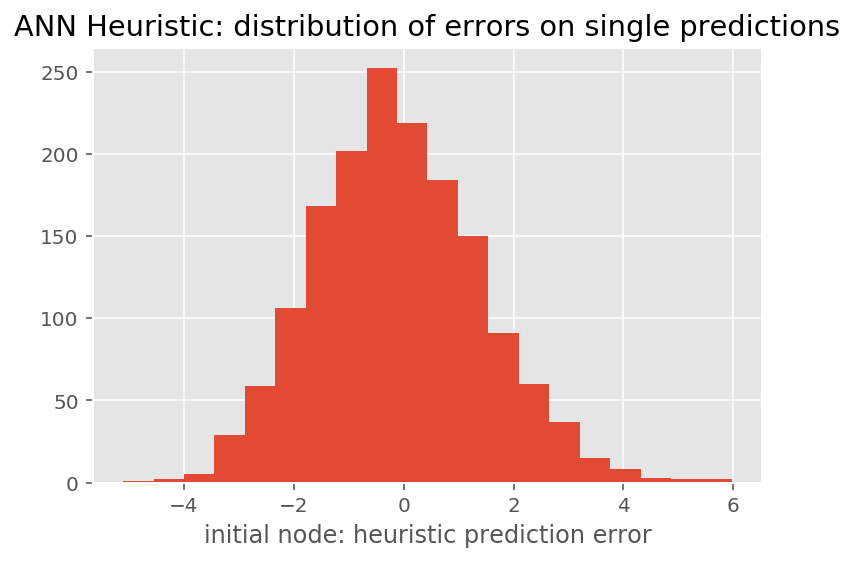

In [23]:
ann_results_complete['INITIAL_HEURISTIC_PREDICTION_ERROR'].hist(bins=20)
plt.title("ANN Heuristic: distribution of errors on single predictions")
plt.xlabel("initial node: heuristic prediction error");

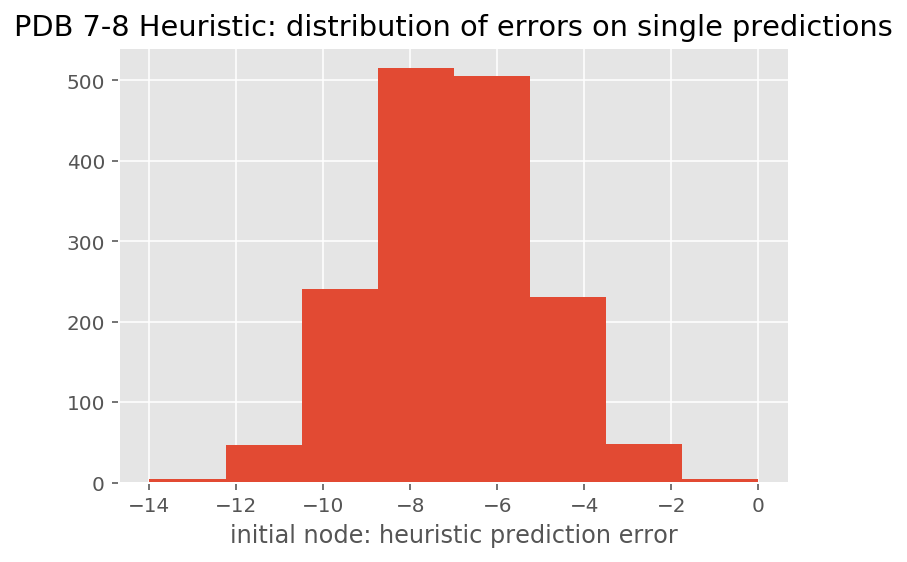

In [26]:
pdb_results_complete['INITIAL_HEURISTIC_PREDICTION_ERROR'].hist(bins=8)
plt.title("PDB 7-8 Heuristic: distribution of errors on single predictions")
plt.xlabel("initial node: heuristic prediction error");

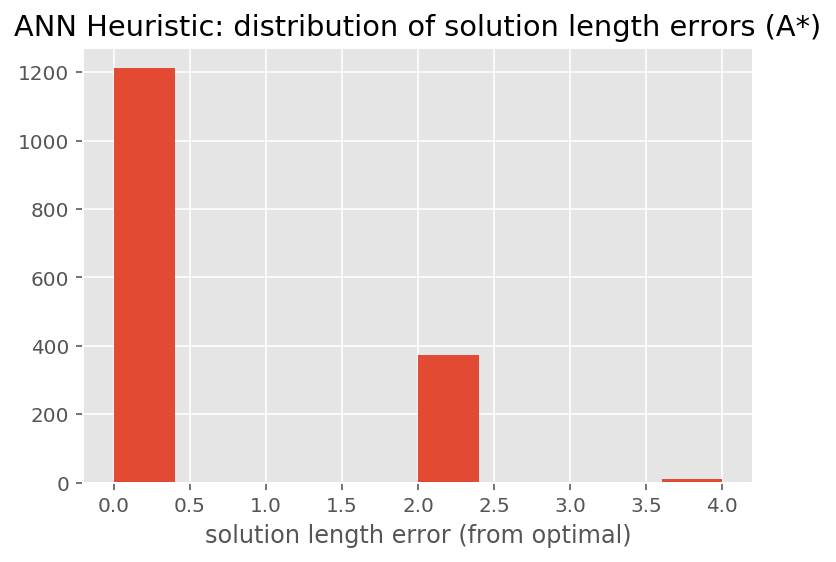

In [35]:
ann_results_complete['SOLUTION_COST_ERROR'].hist(bins=10)
plt.title("ANN Heuristic: distribution of solution length errors (A*)")
plt.xlabel("solution length error (from optimal)");

This is better represented by a table:

In [67]:
solution_length_errors_distribution = pd.DataFrame(ann_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,1211
1,2,373
2,4,11


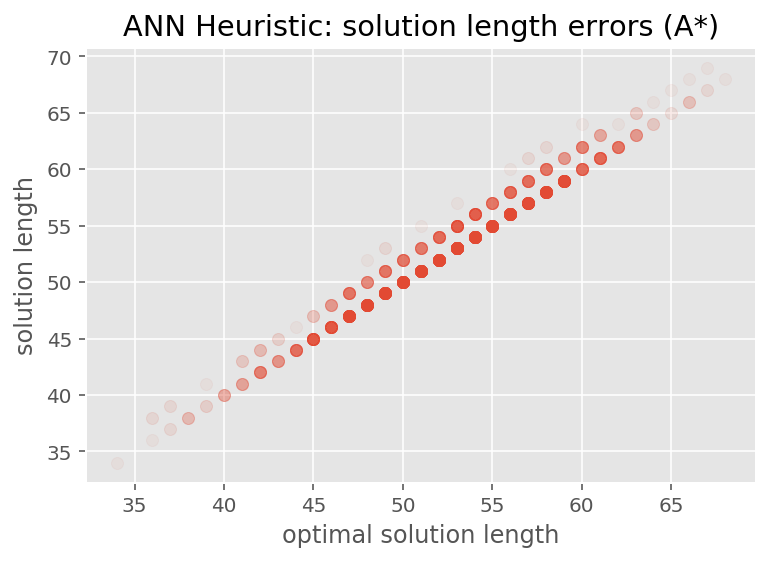

In [44]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["SOLUTION_COST"], alpha=0.05)
plt.title("ANN Heuristic: solution length errors (A*)")
plt.xlabel("optimal solution length")
plt.ylabel("solution length");

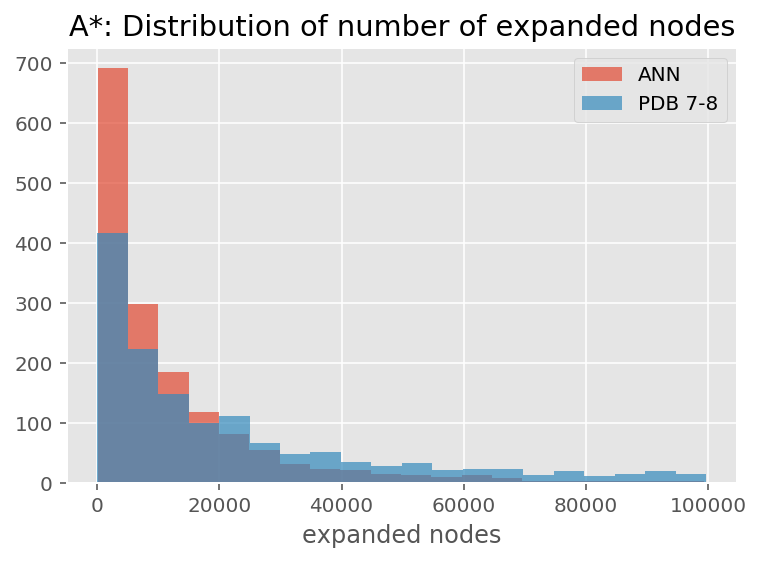

In [53]:
ann_results_complete[ann_results_complete['EXPANDED_NODES'] < 100000]['EXPANDED_NODES'].hist(bins=20, alpha=0.7, label="ANN")
pdb_results_complete[pdb_results_complete['EXPANDED_NODES'] < 100000]['EXPANDED_NODES'].hist(bins=20, alpha=0.7, label="PDB 7-8")
plt.title("A*: Distribution of number of expanded nodes")
plt.xlabel("expanded nodes")
plt.legend();